# 1. Age Estimator

### 1.4 Convolutional Neural Networks (CNN) models: Preprocessing

Perform a number of analyses based on training from scratch to predict age both as a real-valued number and age-category as a classification task.

1. CNN Regression model: predicts age as a continuous real value.
2. CNN Classification model: predicts age group categories.


(a) Import libraries

(b) Load CSVs

(c) Split the data into features and labels 

(d) Encode classification labels

(e) Convert regression labels

In [1]:
# (a) Import libraries
# --------------------------------------------------------------------
import tensorflow as tf             # includes Keras and all its functionalities. It is used for building and training neural networks models such as CNNs.
import matplotlib.pyplot as plt     # for creating visualizations in Python.
import pandas as pd                 # for data manipulation and analysis, particularly for working with DataFrames.  
import numpy as np                  # for numerical computing (e.g. arrays and  mathematical functions).
import os, pathlib                  # for interacting with the operating system and handling file paths.

from sklearn.preprocessing import LabelEncoder          # for encoding categorical labels as integers.
#from tensorflow.keras.utils import to_categorical       # for one-hot encoding categorical labels (actually alrady imported above with tensorflow as tf).
#--------------------------------------------------------------------

In [ ]:
# (b) Load CSV data
# --------------------------------------------------------------------

# Load the CSV files into pandas DataFrames
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")
test_df = pd.read_csv("test.csv")
# --------------------------------------------------------------------

# **suggestion by Copilot to improve performance and avoid potential issues**
    # clean/check paths and ensure proper splits to prevent leakage
# Ensure no overlap between train, val, and test sets
    # set() creates a set of unique image paths from the training DataFrame; it helps to quickly check for overlaps between datasets
train_image_paths = set(train_df['image_path'].tolist())        # .tolist() converts the 'image_path' column to a list to facilitate set creation
val_image_paths = set(val_df['image_path'].tolist())              
test_image_paths = set(test_df['image_path'].tolist())          

    # assert is used to verify conditions and raise an error if the condition is not met
assert train_image_paths.isdisjoint(val_image_paths), "Train and Validation sets overlap!"  # .isdisjoint checks if two sets have no elements in common
assert train_image_paths.isdisjoint(test_image_paths), "Train and Test sets overlap!"       
assert val_image_paths.isdisjoint(test_image_paths), "Validation and Test sets overlap!"

# --------------------------------------------------------------------

# df features names
#print(train_df.columns) # print headers of the dataframe

In [ ]:
# (c) Split the data into features and labels
# --------------------------------------------------------------------
# the columns need to be converted to numpy arrays for TensorFlow models otherwise they will throw errors
 
# Regression labels(real-valued age)
y_train_reg = train_df["age"].values    # df[] to get column as array
y_val_reg   = val_df["age"].values      # .values to convert the pandas series (dataframe column) to numpy array
y_test_reg  = test_df["age"].values

# Classification labels (age categories)
y_train_cls = train_df["age_category"].values
y_val_cls   = val_df["age_category"].values
y_test_cls  = test_df["age_category"].values

# Features: image paths (file names of the images)
X_train = train_df["image_path"].values
X_val   = val_df["image_path"].values
X_test  = test_df["image_path"].values

# --------------------------------------------------------------------

In [29]:
#print(y_train_reg)
#print(y_train_cls)
#print(X_train)

In [ ]:
# (d) Encode classification labels (age categories)
# --------------------------------------------------------------------  

# Encode age categories as integers to transfrom string labels to integer labels
    # label_encoder creates a mapping (e.g., 'child'->0, 'teen'->1, 'adult'->2, 'senior'->3 etc.) based on the unique labels
label_encoder = LabelEncoder()                              
y_train_cls_enc = label_encoder.fit_transform(y_train_cls)  # train_cls_enc is an array of integer labels
y_val_cls_enc   = label_encoder.transform(y_val_cls)
y_test_cls_enc  = label_encoder.transform(y_test_cls)

# One-hot encode the integer labels for multi-class classification
    # e.g., if there are 4 classes, label '2' becomes [0, 0, 1, 0]
    # while _train_cls_enc is an array of integer labels, _train_cls_ohe is a 2D array of one-hot encoded labels (e.g. [[0,1,0,0], [0,0,1,0], ...])
y_train_cls_ohe = to_categorical(y_train_cls_enc)
y_val_cls_ohe   = to_categorical(y_val_cls_enc)
y_test_cls_ohe  = to_categorical(y_test_cls_enc)

# ---> one-hot encoding is needed in the context of categorical_crossentropy loss function because this loss function expects the target labels 
# to be in a one-hot encoded format for multi-class classification problems (in this case, all the age categories). 
# Each target represents a probability distribution over the classes, where the correct class has a probability of 1 and all other classes have a probability of 0.

# ---> categorical_crossentropy is preferred over sparse_categorical_crossentropy (which uses integer labels directly and creates one-hot encoding internally) because 
# it provides more control and flexibility over the encoding process, allowing for custom preprocessing steps if needed.
 # --------------------------------------------------------------------

# ** suggestion by Copilot to improve performance and avoid potential issues**
    
    # print the mapping of original labels to integer labels for verification and reference
    # dict(zip(...)) creates a dictionary from two lists (keys (class names) and values (integer labels))
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))) 
    
    # ensure encoding is consistent
    # .issubset checks if all elements of the first set are in the second set
    # .classes_ contains all unique class labels known to the encoder
assert set(y_train_cls_enc).issubset(set(range(len(label_encoder.classes_)))), "Training labels contain unknown classes!"
assert set(y_val_cls_enc).issubset(set(range(len(label_encoder.classes_)))), "Validation labels contain unknown classes!"
assert set(y_test_cls_enc).issubset(set(range(len(label_encoder.classes_)))), "Test labels contain unknown classes!"

# --------------------------------------------------------------------

# --------------------------------------------------------------------
# (e) Convert regression labels to float32
# --------------------------------------------------------------------

# TensorFlow models often require float32 data type for regression tasks
    # convert from default int64 to float32
y_train_reg = y_train_reg.astype(np.float32) 
y_val_reg   = y_val_reg.astype(np.float32) 
y_test_reg  = y_test_reg.astype(np.float32)

# ---> rather than int64 (discrete integer type), float32(real number with decimal points) is preferred for regression tasks in TensorFlow because:
    # 1. Neural networks perform better with floating-point precision for continuous values (for example to calculate MSE/MAE loss).
    # 2. float32 is more memory efficient than int64, allowing for faster computations and reduced memory usage during training and inference.
    # 3. Many TensorFlow operations and layers are optimized for float32, ensuring compatibility and performance.   
# --------------------------------------------------------------------

# ** suggestion by Copilot to improve performance and avoid potential issues**
    # verify the data types to ensure they are float32
assert y_train_reg.dtype == np.float32, "Training regression labels are not float32!"
assert y_val_reg.dtype == np.float32, "Validation regression labels are not float32!"
assert y_test_reg.dtype == np.float32, "Test regression labels are not float32!"

# --------------------------------------------------------------------

{'child': np.int64(0), 'mature': np.int64(1), 'mid': np.int64(2), 'older': np.int64(3), 'teen': np.int64(4), 'youth': np.int64(5)}


In [31]:
#print(y_train_cls_enc)
#print(y_train_cls_ohe)

(f) Reshape input

(g) Normalise the image data

(h) Create datasets for training/validation/testing

(i) Save the training/validation/testing datasets

In [ ]:
# (f) Reshape input +  (g) Normalise the image data
# --------------------------------------------------------------------  

# Resize images to (128,128) and normalize pixel values to [0,1] as standard preprocessing for CNN inputs
def normalize_images(image_paths):
    images = []
    for path in image_paths:
        # Load image and resize to 128x128
        img = tf.keras.preprocessing.image.load_img(path, target_size=(128, 128)) # Resize to 128x128 from original 200x200
        # Convert to numpy array 
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        # scale pixel (normalize) values to [0, 1]
        img_array /= 255.0              # 255.0 to convert from [0, 255] to [0, 1]  
        images.append(img_array)        # append to list
    return np.array(images)             # convert list to numpy array

# Normalize images for training, validation and testing sets
X_train_norm = normalize_images(X_train)    # apply normalization function
X_val_norm   = normalize_images(X_val)
X_test_norm  = normalize_images(X_test)
# --------------------------------------------------------------------

# **Suggestion by Copilot to improve performance and avoid potential issues**
    # Double-check all arrays/tensors match your CNN’s expected shape (num_samples, 128, 128, 3).
if (X_train_norm.shape[1:] == (128, 128, 3) and
    X_val_norm.shape[1:] == (128, 128, 3) and
    X_test_norm.shape[1:] == (128, 128, 3)):
    print("All input arrays have the correct shape.")
else:
    raise ValueError("One or more input arrays do not have the correct shape.")

# --------------------------------------------------------------------

All input arrays have the correct shape.


In [ ]:
# (h) Create datasets for training/validation/testing
# --------------------------------------------------------------------

# # Prepare TensorFlow datasets (preprocessing step) for training, validation and testing. 
# Training set is shuffled to improve generalization; validation/test sets are kept fixed.

# Define batch size
BATCH_SIZE = 32     # common batch size for training CNNs

# Create TensorFlow datasets for efficient data loading and batching
    # https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices
    # tensors are created from feature and label arrays
    # shuffle training data for better training performance. It helps to reduce overfitting.
        # . shuffle makes sure that every epoch (complete pass through the training data) sees the data in a different order
        # buffer_size defines the number of elements from which the new shuffled dataset will sample. A larger buffer_size means better shuffling but requires more memory. 

# 1. REGRESSION datasets
train_dataset_reg = tf.data.Dataset.from_tensor_slices((X_train_norm, y_train_reg)).shuffle(buffer_size=1000).batch(BATCH_SIZE)
val_dataset_reg   = tf.data.Dataset.from_tensor_slices((X_val_norm, y_val_reg)).batch(BATCH_SIZE)
test_dataset_reg  = tf.data.Dataset.from_tensor_slices((X_test_norm, y_test_reg)).batch(BATCH_SIZE)

# 2. CLASSIFICATION datasets
train_dataset_cls = tf.data.Dataset.from_tensor_slices((X_train_norm, y_train_cls_ohe)).shuffle(buffer_size=1000).batch(BATCH_SIZE)
val_dataset_cls   = tf.data.Dataset.from_tensor_slices((X_val_norm, y_val_cls_ohe)).batch(BATCH_SIZE)
test_dataset_cls  = tf.data.Dataset.from_tensor_slices((X_test_norm, y_test_cls_ohe)).batch(BATCH_SIZE)

# ---> if the training set is not shuffled, the model may learn patterns based on the order of the data rather than the actual features, 
# leading to poor generalization on unseen data.

# ---> only the training dataset is shuffled. Validation and test datasets are not shuffled to ensure consistent evaluation (i.e., the same order of samples (images), each time, 
# instead of random order that would change every epoch, if shuffled, causing inconsistent results, because the model may perform differently on different orders of samples;
# this would make it hard to compare performance across epochs or runs. Comparison is important for hyperparameter tuning and model selection).  

# --------------------------------------------------------------------

In [ ]:
# (i) Save the training/validation/testing datasets
# --------------------------------------------------------------------

# Save the prepared datasets to disk for future use
np.save('X_train_norm.npy', X_train_norm)
np.save('X_val_norm.npy', X_val_norm)
np.save('X_test_norm.npy', X_test_norm)

np.save('y_train_reg.npy', y_train_reg)
np.save('y_val_reg.npy', y_val_reg)
np.save('y_test_reg.npy', y_test_reg)

np.save('y_train_cls_ohe.npy', y_train_cls_ohe)
np.save('y_val_cls_ohe.npy', y_val_cls_ohe)
np.save('y_test_cls_ohe.npy', y_test_cls_ohe)

### 1.5 Convolutional Neural Networks (CNN) models: Training and Evaluation

#### 1.5.1 CNN Regression baseline model

(a) Create a CNN Regression baseline model

(b) Compile the model

(c) Train on train_dataset

(d) Evaluate directly on test_dataset

(e) Plot training/validation curves 

(f) Save model for later comparison / model variations

In [ ]:
# (a) Create a CNN Regression baseline model
# --------------------------------------------------------------------

# .keras.models is used to build neural network models such as CNNs
model_reg = tf.keras.models.Sequential()                            #.Sequential creates a linear stack of layers
                                                                    # .layers are the building blocks of the neural network model.

# Conv2D is a convolutional layer that applies filters to the input image to extract features such as edges, textures, and shapes.
        # activation='relu' is a common activation function used in hidden layers that helps the model learn complex patterns by introducing non-linearity among the layers;
            # linear activation is used in the output layer for regression tasks, as it allows the output to take any real value.
        # input_shape specifies the shape of the input data (128x128 pixels with 3 color channels - RGB)
    # .MaxPooling2D (2d image data) reduces the spatial dimensions (height and width) of the feature maps, helping to reduce the number of parameters 
            # (2x2 pixels at a time instead of 1x1) and computation in the network, while also controlling overfitting.
    # .Flatten() converts the 2D feature maps into a 1D vector to feed into the dense (fully connected) layers.
    # .Dense creates fully connected layers where each neuron is connected to every neuron in the previous layer.
model_reg.add(tf.keras.layers.Conv2D(32, (3, 3),   
            activation='relu', 
            input_shape=(128,128,3)))
model_reg.add(tf.keras.layers.MaxPooling2D((2,2)))                          # max pooling layer to reduce spatial dimensions (2 pixels x 2 pixels to 
model_reg.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))        # second Conv2D layer with 64 filters(3x3 kernel size)
model_reg.add(tf.keras.layers.MaxPooling2D((2,2)))                          # second max pooling layer
model_reg.add(tf.keras.layers.Flatten())                                    # flatten 2D feature maps to 1D vector
model_reg.add(tf.keras.layers.Dense(64, activation='relu'))         # fully connected layer with 64 neurons 
model_reg.add(tf.keras.layers.Dense(1, activation='linear'))        # single neuron for age regression

# ---> A 2×2 MaxPooling layer looks at non-overlapping 2x2 pixel blocks in the input feature map and outputs the maximum value from each block 
    # (e.g the highest pixel intensity value among the 4 pixels in that block).
    # The pooled feature map now has smaller height and width (1/2 of the original dimensions).
    # The next layers will combine these pooled features to detect higher-level patterns in the image.

# --------------------------------------------------------------------
# Warning message:
# ...anaconda3\envs\adl_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. 
# When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
# super().__init__(activity_regularizer=activity_regularizer, **kwargs)
# ---> apparently this is just a warning and the code still runs fine. It seems that Keras prefers define the inpput layers explicitly 
# (e.g. model_reg.add(tf.keras.Input(shape=(128,128,3))) as the first layer instead of passing input_shape to Conv2D).
# --------------------------------------------------------------------

In [ ]:
# (b) Compile the CNN Regression baseline model
# --------------------------------------------------------------------

# https://keras.io/api/losses/

# .compile configures the model for training by specifying the optimizer, loss function, and evaluation metrics.
# For regression tasks:
    # - loss: measures how well the model's predictions match the true continuous labels.
    # Common choices: 
        # - Mean Squared Error (MSE): penalizes larger errors more heavily
        # - Mean Absolute Error (MAE): more interpretable in units of the target (e.g., years) and less sensitive to outliers.
    # metrics: used to monitor performance during training/validation. For regression, MAE is often preferred as it is easy to interpret.

model_reg.compile(
    optimizer='adam',                   # Adam optimizer adapts learning rate and is efficient for CNNs
    loss='mean_squared_error',          # regression loss function (MSE)
    metrics=['mean_absolute_error']     # track MAE during training
)

# --------------------------------------------------------------------

In [ ]:
# (c) Train the CNN Regression baseline model on the training dataset
# --------------------------------------------------------------------

# Datasets for regression model
    # train_dataset_reg = X_train_norm, y_train_reg         --->  used for training the model
    # val_dataset_reg = X_val_norm, y_val_reg               --->  used for monitoring performance during training
    # test_dataset_reg = X_test_norm, y_test_reg            --->  not used in training, only for evaluation after training

# ----> since it is a baseline model, we do not use early stopping or hyperparameter tuning;
# the training is validated on the validation dataset after each epoch to monitor performance and prevent overfitting;
# test dataset is only used after training to evaluate final model performance;

# Train the model
    # .fit trains the model for a fixed number of epochs (iterations over the entire dataset)
model_reg.fit(
    train_dataset_reg,                  # training dataset
    epochs=10,                          # 10 epochs (complete passes through the training dataset) because it is a baseline model
    validation_data=val_dataset_reg     # validation dataset for monitoring performance
)

In [ ]:
# (d) Evaluate the CNN Regression baseline model on the test dataset
# --------------------------------------------------------------------

# .evaluate computes the loss and metrics on the test dataset to assess model performance after training
test_loss, test_mae = model_reg.evaluate(test_dataset_reg, verbose=2)   # verbose=2 for more detailed output during evaluation
print(f"Test MAE: {test_mae:.2f} years")

# the number of verbose levels: 0 = silent, 1 = progress bar, 2 = one line per epoch

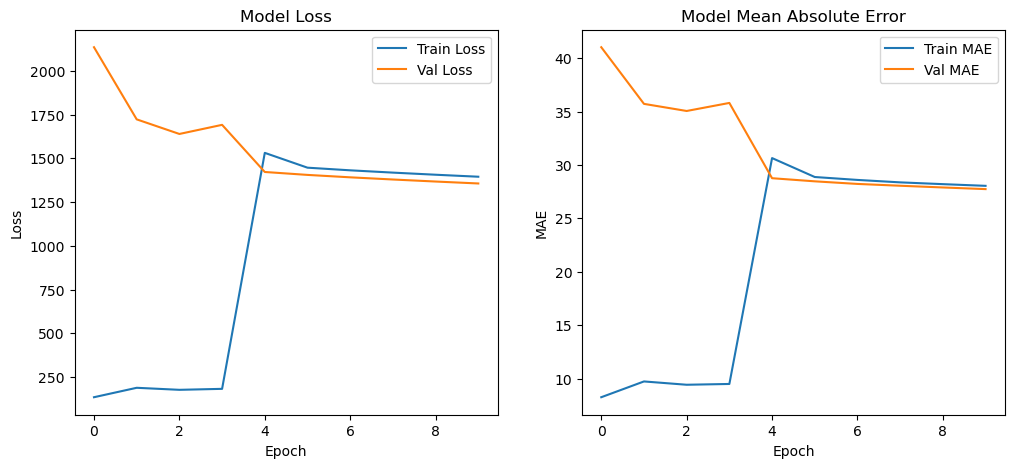

In [ ]:
# (e) Plot training/validation loss and MAE curves
# --------------------------------------------------------------------

# https://www.tensorflow.org/api_docs/python/tf/keras/Model#history

history = model_reg.history   # retrieve training history from the model after training

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()
# --------------------------------------------------------------------


# --------------------------------------------------------------------
# (f) Save model as keras file
# --------------------------------------------------------------------
#model_reg.save('cnn_regression_baseline_model.h5')         # saves the trained model to an HDF5 file for later use

# WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy.
# We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
model_reg.save('cnn_regression_baseline_model.keras')   # saves the trained model to a Keras file for later use


**Results:**
The baseline Regression CNN achieved a high MAE (27.9 years) on the test set, meaning it does not predict ages accurately.
The model did not learn enough patterns from the data since both training and validation losses stayed high (underfitting)
This result is expected for a simple baseline model with no tuning or data augmentation.
This version will remain unchanged, as it will be used as a benchmark to compare with improved models later.

#### 1.5.2 CNN Classification baseline model

(a) Create a CNN classification baseline model

(b) Compile the model

(c) Train on train_dataset

(d) Evaluate on test_dataset

(e) Plot training/validation loss and accuracy curves and save the model

In [ ]:
# (a) Create a CNN classification baseline model
# --------------------------------------------------------------------

num_classes = y_train_cls_ohe.shape[1]   # number of unique age categories (classes) from one-hot encoded labels

model_cls = tf.keras.models.Sequential()

model_cls.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model_cls.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cls.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cls.add(tf.keras.layers.MaxPooling2D((2,2)))  
model_cls.add(tf.keras.layers.Flatten())
model_cls.add(tf.keras.layers.Dense(64, activation='relu'))
model_cls.add(tf.keras.layers.Dense(num_classes, activation='softmax'))     # for multi-class classification

# ---> softmax converts outputs (float values) to probabilities (float values between 0 and 1 that sum to 1) for each class in multi-class classification

In [ ]:
# (b) Compile the CNN Classification baseline model
# --------------------------------------------------------------------

# https://keras.io/api/losses/

# For classification tasks:
    # - loss: measures how well the model's predicted class probabilities match the true one-hot encoded labels.
        # Common choice:
            # - Categorical Crossentropy: used when labels are one-hot encoded (as in this case).  
    # Accuracy is a common metric for classification tasks, measuring the proportion of correct predictions (FP + TN) / (TP + TN + FP + FN).

model_cls.compile(
    optimizer='adam',
    loss='categorical_crossentropy',        # multi-class classification loss function
    metrics=['accuracy']                    # track accuracy during training
)

In [ ]:
# (c) Train the CNN Classification baseline model on the training dataset
# --------------------------------------------------------------------

# Datasets for classification model
    # train_dataset_cls = X_train_norm, y_train_cls_ohe         --->  used for training the model
    # val_dataset_cls = X_val_norm, y_val_cls_ohe               --->  used for monitoring performance during training
    # test_dataset_cls = X_test_norm, y_test_cls_ohe            --->  used for final evaluation after training

# ---> since it is a baseline model, we do not need to use val_dataset_cls for early stopping or hyperparameter tuning;
# the training is validated on the validation dataset after each epoch to monitor performance and prevent overfitting;
# test dataset is only used after training to evaluate final model performance;

model_cls.fit(
    train_dataset_cls,                  # training dataset
    epochs=10,                          # 10 epochs for baseline model
    validation_data=val_dataset_cls     # validation dataset for monitoring performance
)

# --------------------------------------------------------------------

In [ ]:
# (d) Evaluate the CNN Classification baseline model on the test dataset
# --------------------------------------------------------------------

test_loss, test_accuracy = model_cls.evaluate(test_dataset_cls, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# --------------------------------------------------------------------

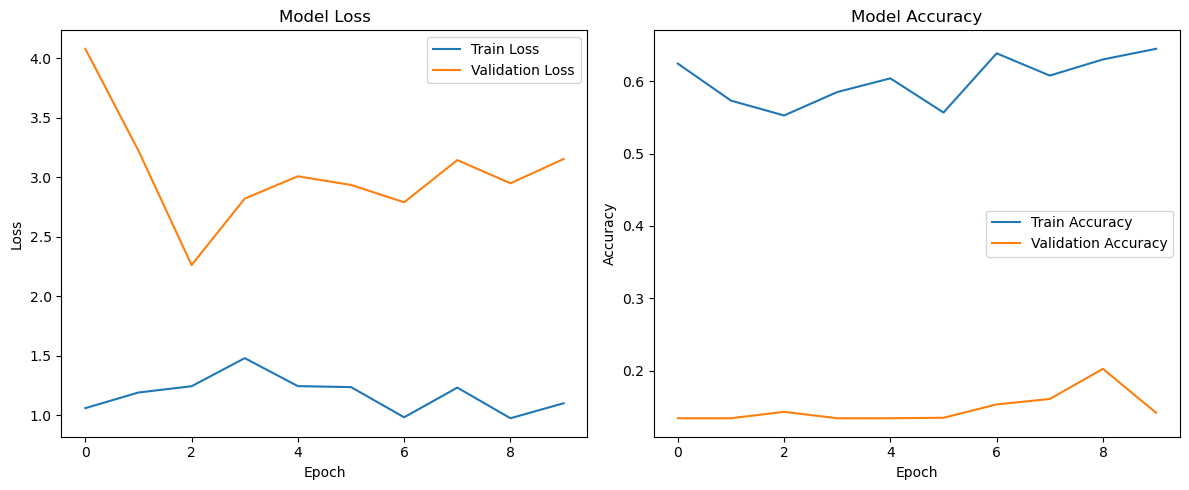

In [ ]:
# (e) Plot training/validation loss and accuracy curves and save the model
# --------------------------------------------------------------------

history_cls = model_cls.history   # retrieve training history from the classification model after training
# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cls.history['loss'], label='Train Loss')
plt.plot(history_cls.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_cls.history['accuracy'], label='Train Accuracy')
plt.plot(history_cls.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# save model as keras file
# --------------------------------------------------------------------
model_cls.save('cnn_classification_baseline_model.keras')   # saves the trained classification model to a Keras file for later use

# --------------------------------------------------------------------


**Results:**
The baseline Classification CNN only about 0.14 accuracy on the validation set, meaning it does not predict the age categories accurately.
Training accuracy was higher (around 0.64), but validation accuracy stayed low: the model overfitted (it learned the training images but could not generalize).
This result is expected for a simple baseline model with no tuning or data augmentation.
This version will remain unchanged, as it will be used as a benchmark to compare with improved models later.